In [1]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from collections import Counter, defaultdict
import json, csv
import numpy as np
import xmltodict
from sklearn.dummy import DummyClassifier
import random
from sklearn.metrics import precision_recall_fscore_support
import statsmodels.api as sm
import statsmodels.formula.api as smf


import os
from statistics import mean, stdev
import warnings 
from scipy.stats import ttest_rel, levene
from collections import defaultdict
from typing import List, Dict, Tuple
from scipy import stats
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from rouge_score import rouge_scorer
from scipy.stats import pearsonr

warnings.filterwarnings('ignore') 

# All analysis on Gemini1.5, 5-s, Task1

In [2]:
all_cases = pd.read_csv('../qualitative_analysis/error_and_correct_both_data.csv')

In [3]:
all_cases['error_type'] = all_cases['error_type'].fillna('correct')

In [29]:
all_cases.drop(columns=['split'], inplace=True)
all_cases.fillna('correct', inplace=True)
all_cases

,dataset,id,gold,pred,argument,stance,comment,error_type,comment_length,is_correct
0,gm,159arg6,0,0,"Marriage is about more than procreation, there...",Pro,This isn't a question of shaking a finger at t...,correct,1120,1
1,gm,196arg6,0,0,"Marriage is about more than procreation, there...",Pro,they shouldnt be able to get married because t...,correct,297,1
2,gm,62arg3,0,0,Gay marriage undermines the institution of mar...,Con,I do not think homosexuals should have any spe...,correct,332,1
3,gm,164arg1,0,0,Gay couples can declare their union without re...,Con,"Well'if we start legalizing gay marriage,that ...",correct,1192,1
4,gm,86arg4,0,0,It is discriminatory to refuse gay couples the...,Pro,If your mom or dad wasnt straight you would'nt...,correct,314,1
...,...,...,...,...,...,...,...,...,...,...
27717,obama,oba108arg4,0,1,Has qualities of a good leader.,Pro,We should give him another opportunity. I saw ...,FP,143,0
27721,obama,oba109arg16,0,1,Ineffective foreign policies.,Con,Obama more indecisive. He said that he had a p...,FP,416,0
27723,obama,oba282arg16,0,1,Ineffective foreign policies.,Con,"No, he will not win in 2012. BECAUSE: His ""ch...",FP,295,0
27726,obama,oba313arg1,0,1,Ending the wars.,Pro,hes just a piece of shit and he hasn't done an...,FP,214,0


In [5]:
topic_prf1 = []

for topic in all_cases['dataset'].unique():
    df = all_cases[all_cases['dataset'] == topic]
    pr, re, f1, _ = precision_recall_fscore_support(df['gold'], df['pred'], average='macro')
    
    topic_prf1.append({
        'dataset': topic,
        'precision': pr,
        'recall': re,
        'f1': f1
    })

topic_prf1_df = pd.DataFrame(topic_prf1).round(3)
topic_prf1_df

,dataset,precision,recall,f1
0,gm,0.816,0.764,0.780
1,ugip,0.738,0.712,0.721
2,abortion,0.658,0.818,0.683
3,gayRights,0.615,0.718,0.620
4,marijuana,0.614,0.678,0.627
5,obama,0.602,0.749,0.615


In [6]:
stance_prf1 = []

for stance in ['Pro', 'Con']:
    df = all_cases[all_cases['stance'] == stance]
    pr, re, f1, _ = precision_recall_fscore_support(df['gold'], df['pred'], average='binary')

    stance_prf1.append({
        'stance': stance,
        'precision': pr,
        'recall': re,
        'f1': f1
    })

stance_prf1_df = pd.DataFrame(stance_prf1).round(3)
stance_prf1_df

,stance,precision,recall,f1
0,Pro,0.362,0.639,0.462
1,Con,0.292,0.712,0.414


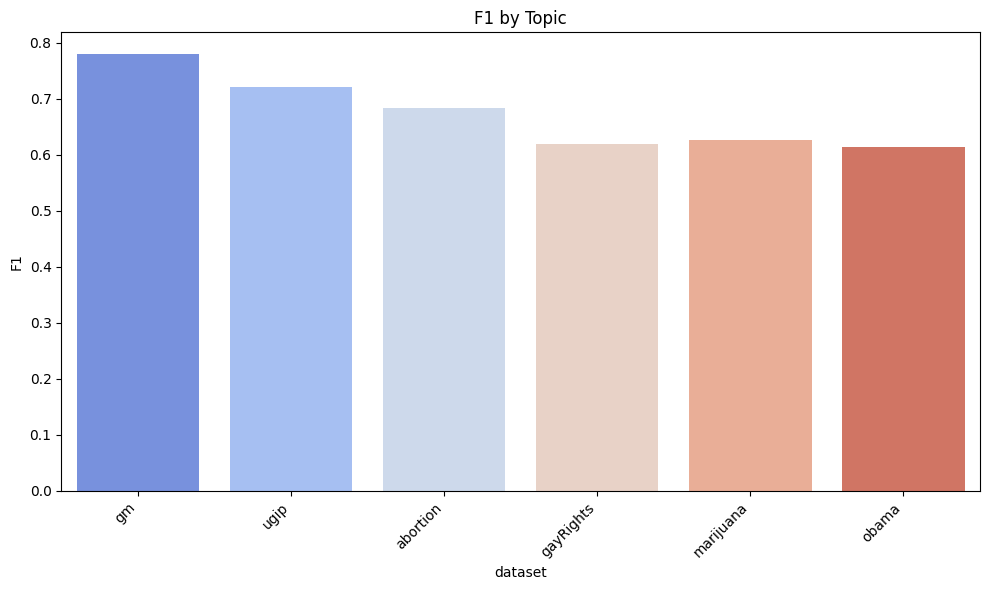

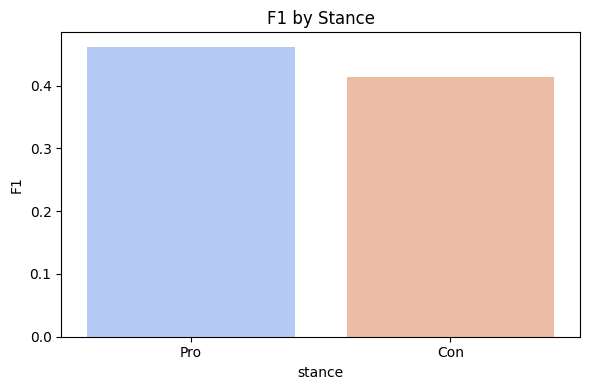

In [7]:
metrics = ['f1']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=topic_prf1_df, x='dataset', y=metric, palette='coolwarm')
    plt.title(f'{metric.capitalize()} by Topic')
    plt.ylabel(f'{metric.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for metric in metrics:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=stance_prf1_df, x='stance', y=metric, palette='coolwarm')
    plt.title(f'{metric.capitalize()} by Stance')
    plt.ylabel(f'{metric.capitalize()}')
    plt.tight_layout()
    plt.show()


In [8]:
all_cases = all_cases[all_cases['argument'] != 'Others']
all_cases

,dataset,id,gold,pred,argument,stance,comment,error_type,split
0,gm,159arg6,0,0,"Marriage is about more than procreation, there...",Pro,This isn't a question of shaking a finger at t...,correct,NaN
1,gm,196arg6,0,0,"Marriage is about more than procreation, there...",Pro,they shouldnt be able to get married because t...,correct,NaN
2,gm,62arg3,0,0,Gay marriage undermines the institution of mar...,Con,I do not think homosexuals should have any spe...,correct,NaN
3,gm,164arg1,0,0,Gay couples can declare their union without re...,Con,"Well'if we start legalizing gay marriage,that ...",correct,NaN
4,gm,86arg4,0,0,It is discriminatory to refuse gay couples the...,Pro,If your mom or dad wasnt straight you would'nt...,correct,NaN
...,...,...,...,...,...,...,...,...,...
27717,obama,oba108arg4,0,1,Has qualities of a good leader.,Pro,We should give him another opportunity. I saw ...,FP,2.0
27721,obama,oba109arg16,0,1,Ineffective foreign policies.,Con,Obama more indecisive. He said that he had a p...,FP,2.0
27723,obama,oba282arg16,0,1,Ineffective foreign policies.,Con,"No, he will not win in 2012. BECAUSE: His ""ch...",FP,2.0
27726,obama,oba313arg1,0,1,Ending the wars.,Pro,hes just a piece of shit and he hasn't done an...,FP,2.0


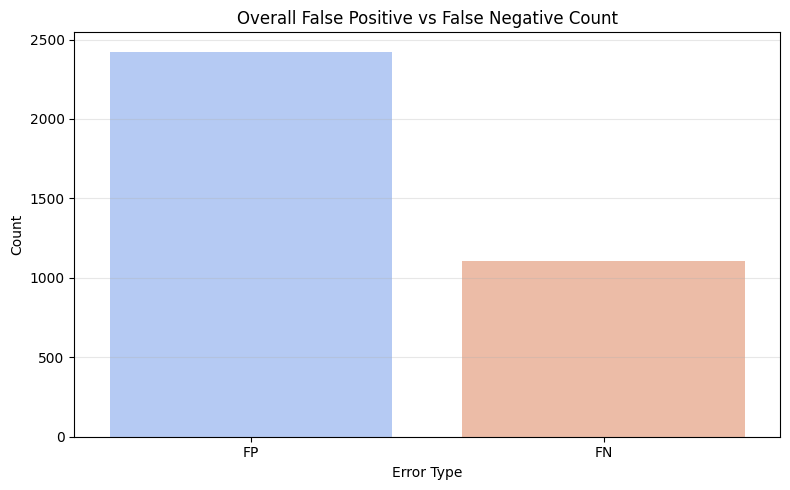

In [9]:
overall_errors = all_cases['error_type'].value_counts().reset_index()
overall_errors = overall_errors[overall_errors['error_type'] != 'correct']
overall_errors.columns = ['error_type', 'count']

plt.figure(figsize=(8, 5))
sns.barplot(data=overall_errors,
            x='error_type', y='count', palette='coolwarm')

plt.title("Overall False Positive vs False Negative Count")
plt.xlabel("Error Type")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

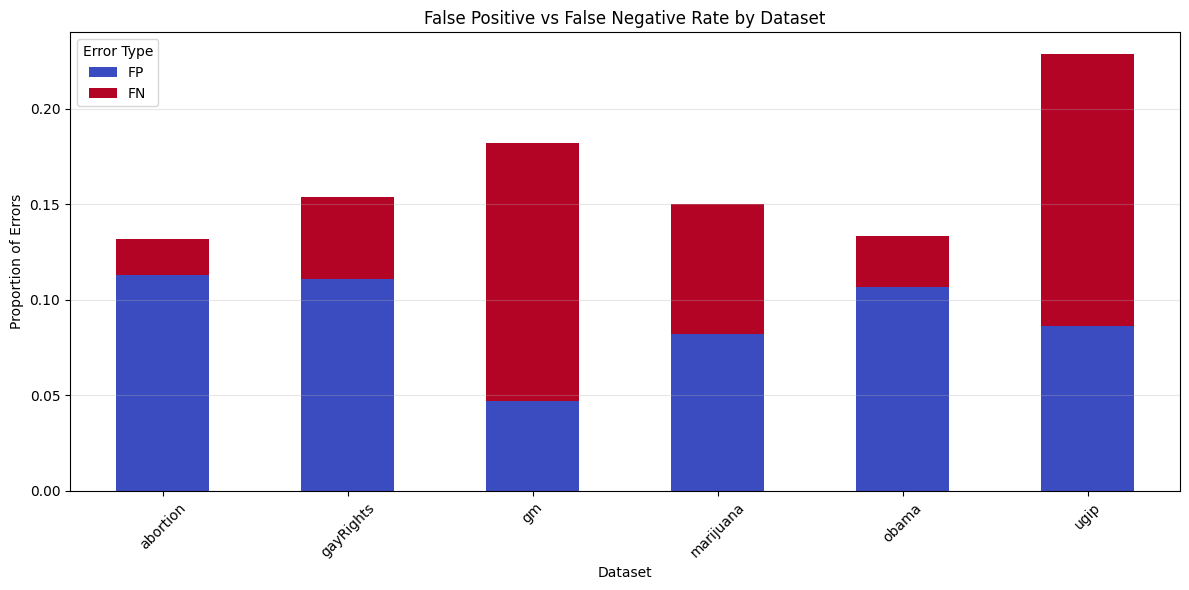

In [10]:
error_dist = all_cases.groupby(['dataset', 'error_type']).size().reset_index(name='count')

error_pivot = error_dist.pivot(index='dataset', columns='error_type', values='count').fillna(0)

error_pct = error_pivot.div(error_pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
error_pct[['FP', 'FN']].plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.title("False Positive vs False Negative Rate by Dataset")
plt.ylabel("Proportion of Errors")
plt.xlabel("Dataset")
plt.xticks(rotation=45)
plt.legend(title="Error Type")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

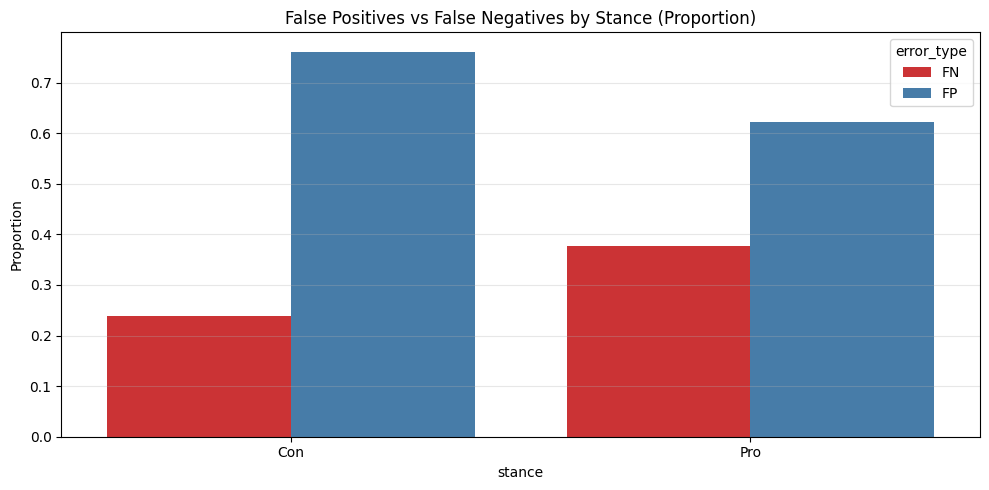

In [11]:
fp_fn_cases = all_cases[all_cases['error_type'].isin(['FP', 'FN'])]

stance_errors = fp_fn_cases.groupby(['stance', 'error_type']).size().reset_index(name='count')

stance_errors_total = stance_errors.groupby('stance')['count'].transform('sum')
stance_errors['proportion'] = stance_errors['count'] / stance_errors_total

plt.figure(figsize=(10, 5))
sns.barplot(data=stance_errors, x='stance', y='proportion', hue='error_type', palette='Set1')
plt.title("False Positives vs False Negatives by Stance (Proportion)")
plt.ylabel("Proportion")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

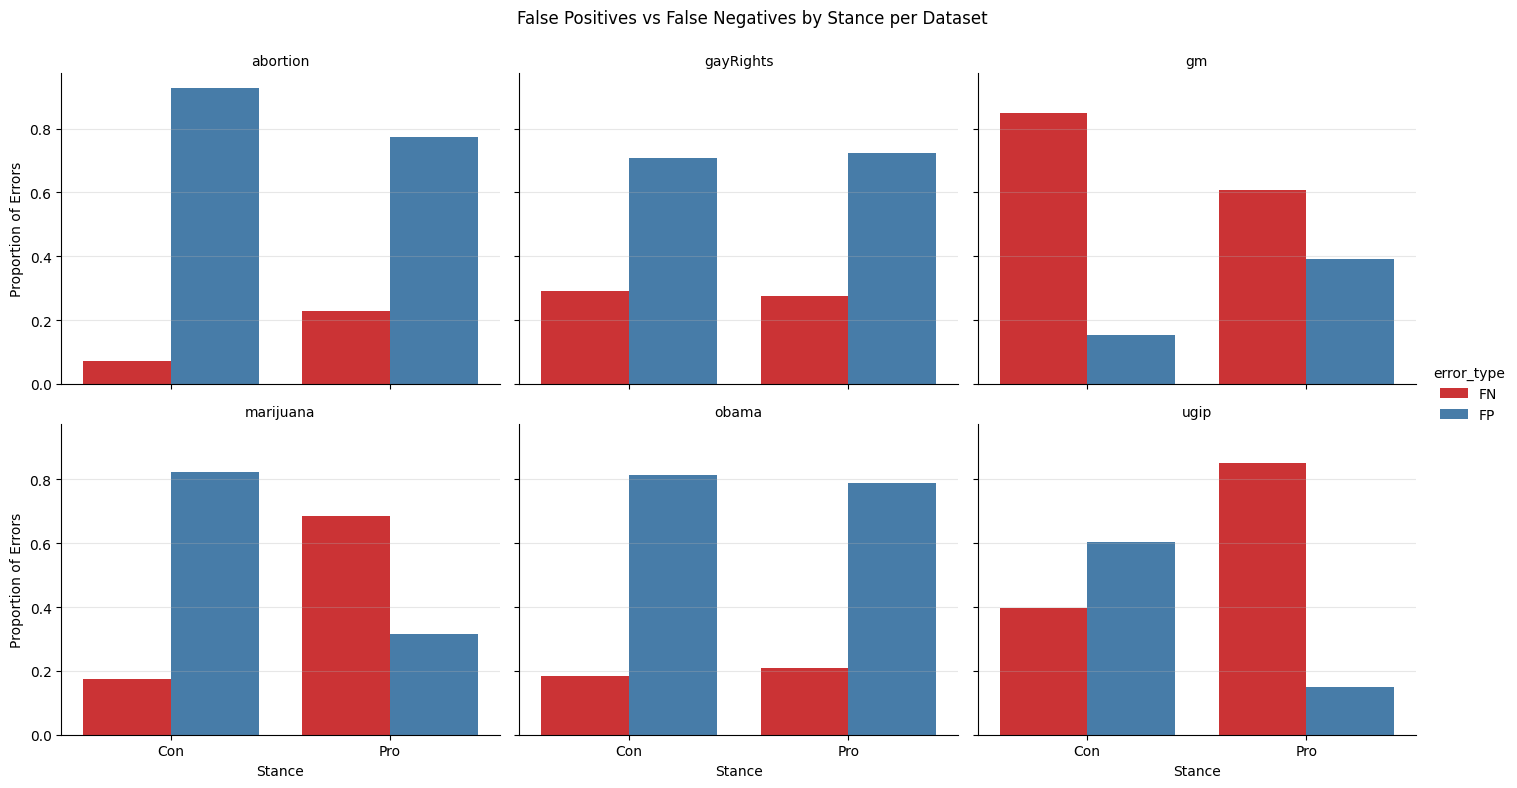

In [12]:
fp_fn_cases = all_cases[all_cases['error_type'].isin(['FP', 'FN'])]

topic_stance_errors = fp_fn_cases.groupby(['dataset', 'stance', 'error_type']).size().reset_index(name='count')

topic_stance_errors['proportion'] = topic_stance_errors.groupby(['dataset', 'stance'])['count'].transform(lambda x: x / x.sum())

g = sns.catplot(
    data=topic_stance_errors,
    x='stance', y='proportion', hue='error_type',
    col='dataset', col_wrap=3,
    kind='bar', height=4, aspect=1.2,
    palette='Set1'
)

g.set_titles("{col_name}")
g.set_axis_labels("Stance", "Proportion of Errors")
g.set_xticklabels(["Con", "Pro"])
for ax in g.axes.flatten():
    ax.grid(axis='y', alpha=0.3)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("False Positives vs False Negatives by Stance per Dataset")

plt.show()

In [13]:
all_cases

,dataset,id,gold,pred,argument,stance,comment,error_type,split
0,gm,159arg6,0,0,"Marriage is about more than procreation, there...",Pro,This isn't a question of shaking a finger at t...,correct,NaN
1,gm,196arg6,0,0,"Marriage is about more than procreation, there...",Pro,they shouldnt be able to get married because t...,correct,NaN
2,gm,62arg3,0,0,Gay marriage undermines the institution of mar...,Con,I do not think homosexuals should have any spe...,correct,NaN
3,gm,164arg1,0,0,Gay couples can declare their union without re...,Con,"Well'if we start legalizing gay marriage,that ...",correct,NaN
4,gm,86arg4,0,0,It is discriminatory to refuse gay couples the...,Pro,If your mom or dad wasnt straight you would'nt...,correct,NaN
...,...,...,...,...,...,...,...,...,...
27717,obama,oba108arg4,0,1,Has qualities of a good leader.,Pro,We should give him another opportunity. I saw ...,FP,2.0
27721,obama,oba109arg16,0,1,Ineffective foreign policies.,Con,Obama more indecisive. He said that he had a p...,FP,2.0
27723,obama,oba282arg16,0,1,Ineffective foreign policies.,Con,"No, he will not win in 2012. BECAUSE: His ""ch...",FP,2.0
27726,obama,oba313arg1,0,1,Ending the wars.,Pro,hes just a piece of shit and he hasn't done an...,FP,2.0


## Quantitative analysis

In [15]:
### 1. Effect of Argument Frequency on Accuracy

arg_counts = all_cases['argument'].value_counts().reset_index()
arg_counts.columns = ['argument', 'frequency']

def compute_f1(group):
    return f1_score(group['gold'], group['pred'], average='macro')

arg_f1 = all_cases.groupby('argument').apply(compute_f1).reset_index()
arg_f1.columns = ['argument', 'f1']

arg_analysis = pd.merge(arg_counts, arg_f1, on='argument')

corr, p_value = pearsonr(arg_analysis['frequency'], arg_analysis['f1'])
print(f"Correlation between argument frequency and F1: {corr:.4f} (p={p_value:.4f})")

Correlation between argument frequency and F1: 0.2273 (p=0.0782)


- Weak positive effect of frequency

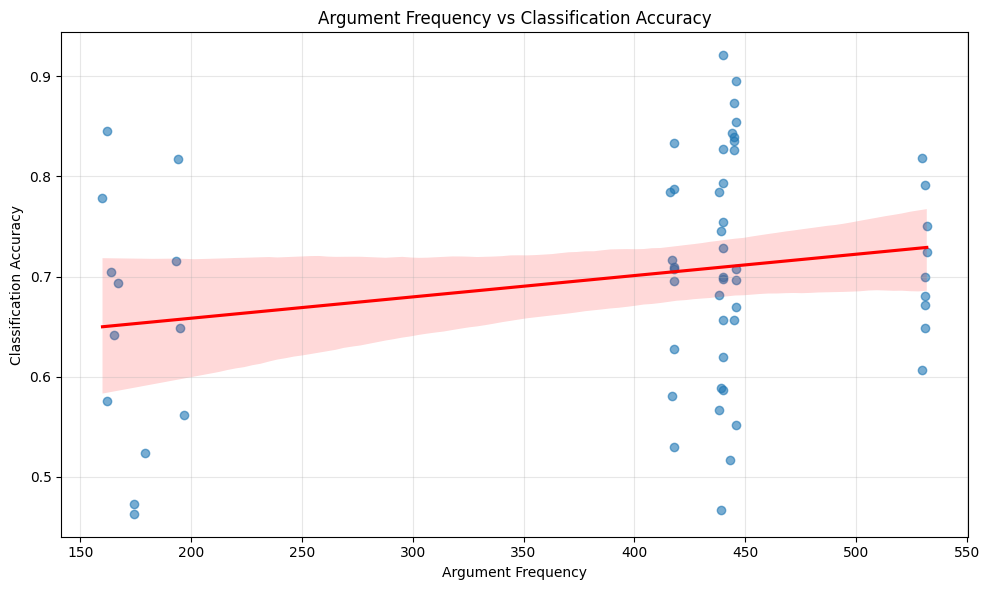

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=arg_analysis, 
    x='frequency', 
    y='f1', 
    scatter_kws={'alpha':0.6}, 
    line_kws={'color':'red'}
)
plt.xlabel('Argument Frequency')
plt.ylabel('Classification Accuracy')
plt.title('Argument Frequency vs Classification Accuracy')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
all_cases

,dataset,split,id,gold,pred,argument,stance,comment,f1,error_type
0,gm,3,159arg6,0,0,"Marriage is about more than procreation, there...",Pro,This isn't a question of shaking a finger at t...,0.807899,correct
1,gm,3,196arg6,0,0,"Marriage is about more than procreation, there...",Pro,they shouldnt be able to get married because t...,0.807899,correct
2,gm,3,62arg3,0,0,Gay marriage undermines the institution of mar...,Con,I do not think homosexuals should have any spe...,0.807899,correct
3,gm,3,164arg1,0,0,Gay couples can declare their union without re...,Con,"Well'if we start legalizing gay marriage,that ...",0.807899,correct
4,gm,3,86arg4,0,0,It is discriminatory to refuse gay couples the...,Pro,If your mom or dad wasnt straight you would'nt...,0.807899,correct
...,...,...,...,...,...,...,...,...,...,...
27743,obama,5,oba108arg4,0,1,Has qualities of a good leader.,Pro,We should give him another opportunity. I saw ...,0.670869,FP
27746,obama,5,oba109arg16,0,1,Ineffective foreign policies.,Con,Obama more indecisive. He said that he had a p...,0.670869,FP
27748,obama,5,oba282arg16,0,1,Ineffective foreign policies.,Con,"No, he will not win in 2012. BECAUSE: His ""ch...",0.670869,FP
27750,obama,5,oba313arg1,0,1,Ending the wars.,Pro,hes just a piece of shit and he hasn't done an...,0.670869,FP


In [17]:
### 2. Single Argument Performance (F1-based)

worst_args = arg_analysis.sort_values('f1').head(10)
best_args = arg_analysis.sort_values('f1', ascending=False).head(10)


arg_topics = all_cases.groupby('argument')['dataset'].first().reset_index()
arg_analysis = pd.merge(arg_analysis, arg_topics, on='argument')

topic_counts = all_cases['dataset'].value_counts().reset_index()
topic_counts.columns = ['dataset', 'topic_total']

arg_analysis = pd.merge(arg_analysis, topic_counts, on='dataset')

arg_analysis['topic_proportion'] = arg_analysis['frequency'] / arg_analysis['topic_total']

worst_args = arg_analysis.sort_values('f1').head(10)[['argument', 'f1', 'frequency', 'topic_proportion', 'dataset']]
best_args = arg_analysis.sort_values('f1', ascending=False).head(10)[['argument', 'f1', 'frequency', 'topic_proportion', 'dataset']]

In [18]:
worst_args

,argument,f1,frequency,topic_proportion,dataset
53,Implies ultimate power on the part of the state,0.462963,174,0.172962,ugip
32,Poor decision-maker.,0.466328,439,0.062438,obama
54,Likely to be seen as a state sanctioned condem...,0.472727,174,0.172962,ugip
21,Abortion kills a life.,0.516972,443,0.076538,abortion
52,Marriage should be between a man and a woman,0.523669,179,0.139844,gm
41,Causes crime.,0.529398,418,0.100096,marijuana
9,Abortion is not murder.,0.551179,446,0.077056,abortion
48,Gay marriage undermines the institution of mar...,0.561350,197,0.153906,gm
37,Makes good decisions/policies.,0.566475,438,0.062296,obama
59,America is based on democracy and the pledge s...,0.576129,162,0.161034,ugip


In [19]:
def compute_f1_stance(group):
    return f1_score(group['gold'], group['pred'], average='macro')

stance_f1 = all_cases.groupby('stance').apply(compute_f1_stance).reset_index()
stance_f1.columns = ['stance', 'f1']

stance_errors = all_cases.groupby(['stance', 'error_type']).size().unstack().fillna(0)
stance_errors_pct = stance_errors.div(stance_errors.sum(axis=1), axis=0)

stance_preds = pd.crosstab(all_cases['stance'], all_cases['pred'])
stance_preds_pct = stance_preds.div(stance_preds.sum(axis=1), axis=0)

print("F1 by stance:")
print(stance_f1)
print("\nPrediction distribution by stance:")
print(stance_preds_pct)

F1 by stance:
  stance        f1
0    Con  0.722708
1    Pro  0.737593

Prediction distribution by stance:
pred           0         1
stance                    
Con     0.804701  0.195299
Pro     0.814403  0.185597


- Model tends to underpredict

In [20]:
dataset_f1 = all_cases.groupby('dataset').apply(
    lambda x: f1_score(x['gold'], x['pred'], average='macro')
).reset_index()
dataset_f1.columns = ['dataset', 'f1']

dataset_errors = all_cases.groupby(['dataset', 'error_type']).size().unstack().fillna(0)
dataset_errors_pct = dataset_errors.div(dataset_errors.sum(axis=1), axis=0)

dataset_stance_f1 = all_cases.groupby(['dataset', 'stance']).apply(
    lambda x: f1_score(x['gold'], x['pred'], average='macro')
).reset_index()
dataset_stance_f1.columns = ['dataset', 'stance', 'f1']

print("F1 by dataset:")
print(dataset_f1)
print("\nError type distribution by dataset:")
print(dataset_errors_pct)

F1 by dataset:
     dataset        f1
0   abortion  0.761508
1  gayRights  0.729133
2         gm  0.780473
3  marijuana  0.706518
4      obama  0.683282
5       ugip  0.721417

Error type distribution by dataset:
error_type        FN        FP   correct
dataset                                 
abortion    0.018832  0.112820  0.868348
gayRights   0.043315  0.110693  0.845993
gm          0.135156  0.046875  0.817969
marijuana   0.068247  0.082136  0.849617
obama       0.026454  0.106955  0.866591
ugip        0.142147  0.086481  0.771372


<Figure size 1200x600 with 0 Axes>

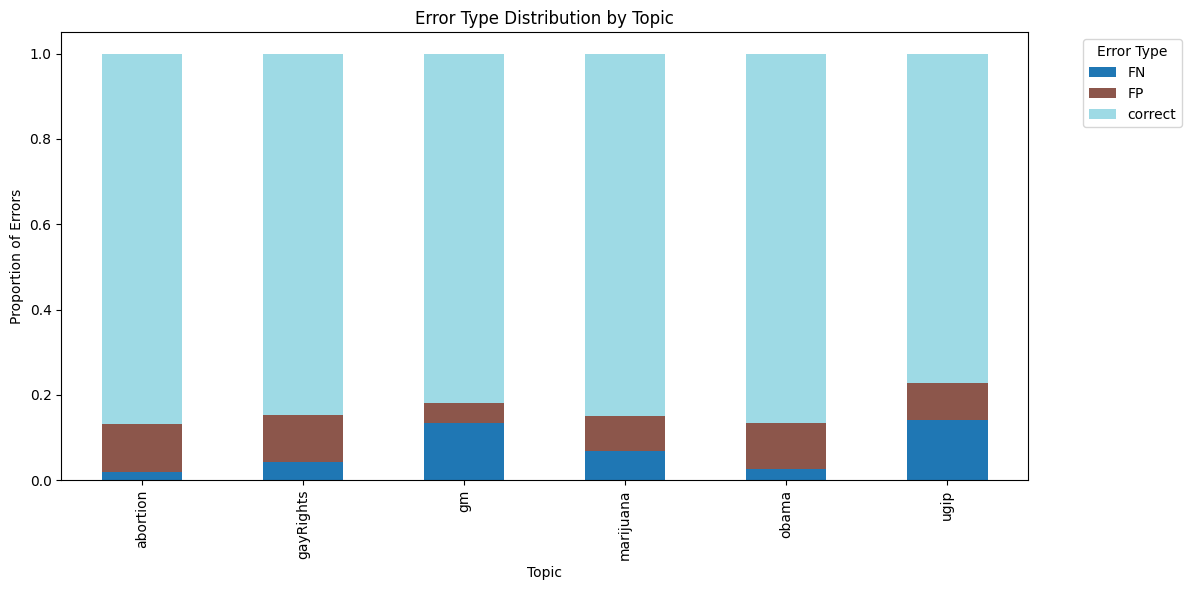

In [21]:
plt.figure(figsize=(12, 6))
dataset_errors_pct.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 6))
plt.title('Error Type Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Proportion of Errors')
plt.legend(title='Error Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
argument_metrics = all_cases.groupby('argument').agg({
    'id': 'count',  
    'error_type': lambda x: (x == 'correct').mean(),  # accuracy
    'pred': 'mean',  # average prediction (shows bias toward 0 or 1)
    'gold': 'mean'   # actual distribution
}).reset_index()

argument_metrics = argument_metrics.rename(columns={
    'id': 'frequency',
    'error_type': 'accuracy'
})

error_by_arg = all_cases.groupby(['argument', 'error_type']).size().unstack(fill_value=0)
error_by_arg_pct = error_by_arg.div(error_by_arg.sum(axis=1), axis=0)

if 'FP' in error_by_arg_pct.columns and 'FN' in error_by_arg_pct.columns:
    argument_metrics = argument_metrics.merge(
        error_by_arg_pct[['FP', 'FN']], 
        left_on='argument', 
        right_index=True
    )

best_args = argument_metrics.sort_values('accuracy', ascending=False).head(10)
worst_args = argument_metrics.sort_values('accuracy', ascending=True).head(10)

common_args = argument_metrics[argument_metrics['frequency'] > 100].sort_values('accuracy')

fp_heavy = argument_metrics.sort_values('FP', ascending=False).head(10) if 'FP' in argument_metrics.columns else None
fn_heavy = argument_metrics.sort_values('FN', ascending=False).head(10) if 'FN' in argument_metrics.columns else None

In [ ]:
fp_heavy

In [ ]:
fn_heavy

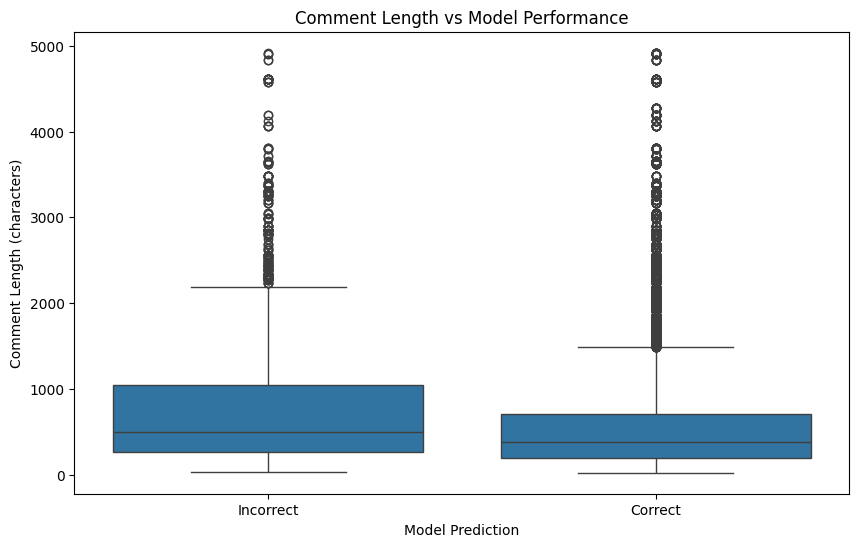

In [22]:
all_cases["comment_length"] = all_cases["comment"].str.len()
all_cases = all_cases[all_cases['comment'].str.len() <= 5000]

all_cases["is_correct"] = all_cases["error_type"].apply(lambda x: 1 if x == "correct" else 0)
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_cases, x="is_correct", y="comment_length")
plt.xticks([0, 1], ["Incorrect", "Correct"])
plt.xlabel("Model Prediction")
plt.ylabel("Comment Length (characters)")
plt.title("Comment Length vs Model Performance")
plt.show()

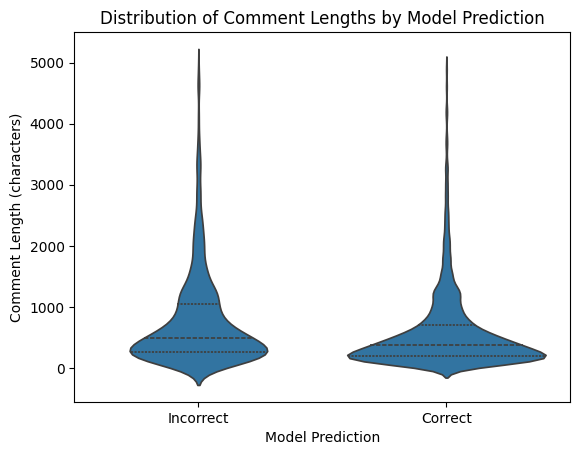

In [23]:
sns.violinplot(data=all_cases, x="is_correct", y="comment_length", inner="quartile")
plt.xticks([0, 1], ["Incorrect", "Correct"])
plt.xlabel("Model Prediction")
plt.ylabel("Comment Length (characters)")
plt.title("Distribution of Comment Lengths by Model Prediction")
plt.show()

In [24]:
from scipy.stats import ttest_ind

correct_lengths = all_cases[all_cases["is_correct"] == 1]["comment_length"]
incorrect_lengths = all_cases[all_cases["is_correct"] == 0]["comment_length"]

t_stat, p_value = ttest_ind(correct_lengths, incorrect_lengths, equal_var=False)
print(f"T-test result: t={t_stat:.3f}, p={p_value:.4f}")

T-test result: t=-13.167, p=0.0000


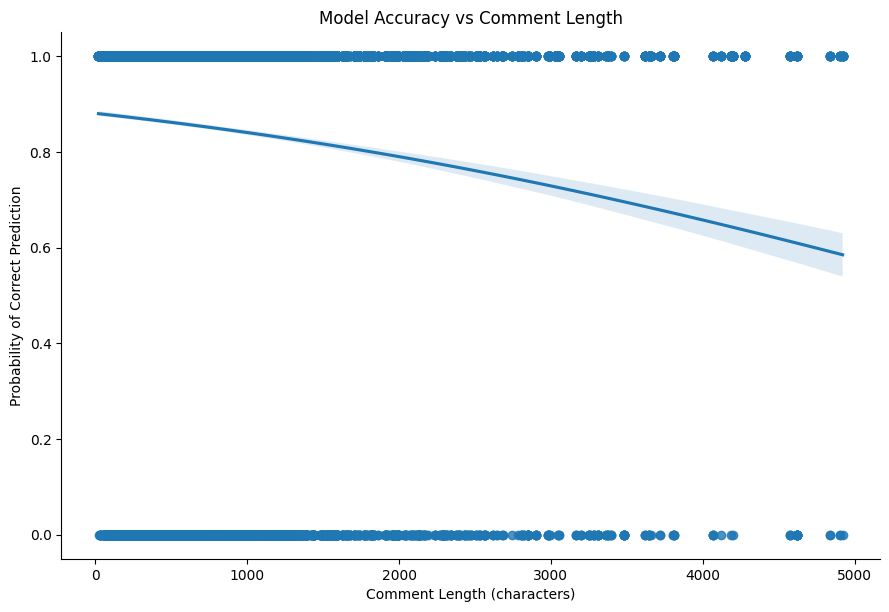

In [25]:
sns.lmplot(data=all_cases, x="comment_length", y="is_correct", logistic=True, height=6, aspect=1.5)
plt.xlabel("Comment Length (characters)")
plt.ylabel("Probability of Correct Prediction")
plt.title("Model Accuracy vs Comment Length")
plt.show()

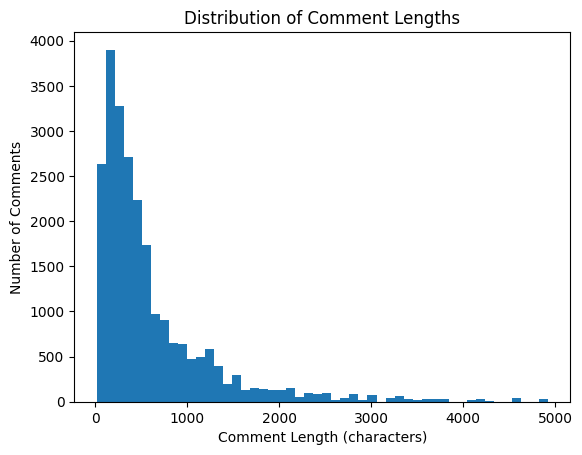

In [26]:
all_cases['comment_length'] = all_cases['comment'].str.len()

plt.hist(all_cases['comment_length'], bins=50)
plt.xlabel('Comment Length (characters)')
plt.ylabel('Number of Comments')
plt.title('Distribution of Comment Lengths')
plt.show()

- We excluded the top 5% longest comments (over 3000 characters) to reduce the influence of outliers. The logistic regression model shows a clear inverse relationship between comment length and model accuracy, with shorter comments more likely to be classified correctly. Although the per-character drop is small, over hundreds/thousands of characters, the effect becomes meaningful

In [27]:
model = smf.logit("is_correct ~ comment_length", data=all_cases).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.410685
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_correct   No. Observations:                23873
Model:                          Logit   Df Residuals:                    23871
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Apr 2025   Pseudo R-squ.:                0.009708
Time:                        15:06:31   Log-Likelihood:                -9804.3
converged:                       True   LL-Null:                       -9900.4
Covariance Type:            nonrobust   LLR p-value:                 1.043e-43
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.9964      0.025     79.938      0.000       1.947       2.045
comment_length    -0.0003   2.32e-05    -14.496      0.000      -0.000      -0.000
==================================================================================
"""

# Qualitative analysis

In [28]:
error_samples = all_cases[all_cases['error_type'].isin(['FP', 'FN'])].groupby('dataset').apply(
    lambda x: x.sample(min(8, len(x)))
).reset_index(drop=True)

os.makedirs("qualitative_analysis", exist_ok=True)
error_samples.to_csv("qualitative_analysis/error_samples.csv", index=False, encoding='utf-8')